## Was the advertising campaign effective? Did additional consumers convert as a result of the campaign?

<p> evlaute the conversation rate for exposed and control groups</p>

In [1]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('rocket_fuel.csv')

# Calculate the total number of converted and non-converted users
converted_counts = data['converted'].value_counts()

# Calculate the number of conversions for exposed and control groups
conversions_exposed = data[data['test'] == 1]['converted'].sum()
conversions_control = data[data['test'] == 0]['converted'].sum()

# Calculate the total number of users in exposed and control groups
total_users_exposed = data[data['test'] == 1].shape[0]
total_users_control = data[data['test'] == 0].shape[0]

# Calculate conversion rates for both exposed and control groups
conversion_rate_exposed = (conversions_exposed / total_users_exposed) * 100
conversion_rate_control = (conversions_control / total_users_control) * 100

# Create a dictionary to store the results
results = {
    "Group": ["Total", "Exposed", "Control"],
    "Converted Users": [converted_counts[1], conversions_exposed, conversions_control],
    "Non-Converted Users": [converted_counts[0], total_users_exposed - conversions_exposed, total_users_control - conversions_control],
    "Total Users": [converted_counts[1] + converted_counts[0], total_users_exposed, total_users_control],
    "Conversion Rate (%)": [
        (converted_counts[1] / (converted_counts[1] + converted_counts[0])) * 100,
        conversion_rate_exposed,
        conversion_rate_control
    ]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Export the DataFrame to a CSV file
export_path = 'conversion_analysis_table.csv'
results_df.to_csv(export_path, index=False)

# Display the DataFrame as a table
display(results_df)

## save results to csv 
results_df.to_csv('conversion_analysis_table.csv', index=False)

,Group,Converted Users,Non-Converted Users,Total Users,Conversion Rate (%)
0,Total,14843,573258,588101,2.523886
1,Exposed,14423,550154,564577,2.554656
2,Control,420,23104,23524,1.785411


## Was the campaign profitable?

<p> answering this we need to determine the revinue from the conversions, the total cost of the campaign.. Then determine the Return on Investment...</p>

<p> total revenue per conversion is: $40</p>

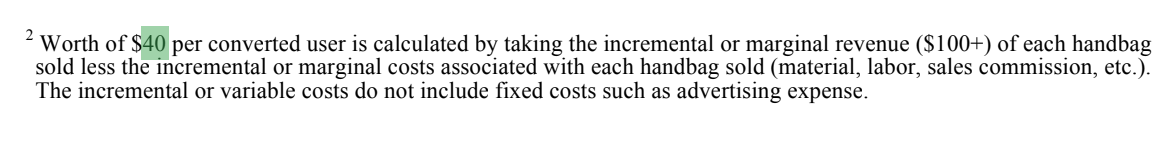


<p> Total Cost of CPMs is $9 </p>

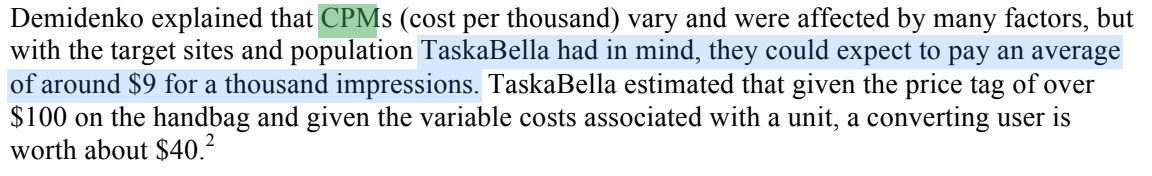

In [4]:
# Set the revenue per conversion
revenue_per_conversion = 40

# Calculate the total revenue generated by the exposed group
revenue_from_campaign = conversions_exposed * revenue_per_conversion

# Set the cost per thousand impressions (CPM)
CPM = 9

# Calculate the total impressions served to the exposed group
total_impressions_exposed = data[data['test'] == 1]['tot_impr'].sum()

# Calculate the cost of the campaign
cost_of_campaign = (total_impressions_exposed / 1000) * CPM


# Calculate the ROI
ROI = round((revenue_from_campaign - cost_of_campaign) / cost_of_campaign * 100, 2)

# Calculate the opportunity cost
# Define key variables
control_group_size = total_users_control
conversion_rate_exposed = 2.55 / 100  # Converting percentage to a decimal
conversion_rate_control = 1.79 / 100  # Converting percentage to a decimal
revenue_per_conversion = 40

# Calculate the opportunity cost
additional_conversions = control_group_size * (conversion_rate_exposed - conversion_rate_control)
opportunity_cost_revenue = additional_conversions * revenue_per_conversion

# Display the results
results = {
    "Metric": ["Revenue from the campaign", "Cost of the campaign", "ROI of the campaign", "Opportunity cost due to the control group"],
    "Value": [round(revenue_from_campaign, 2), round(cost_of_campaign, 2), ROI, opportunity_cost_revenue]
}

results_df = pd.DataFrame(results)
display(results_df)

## save results to csv
results_df.to_csv('campaign_profits_analysis_table.csv', index=False)


,Metric,Value
0,Revenue from the campaign,576920.000
1,Cost of the campaign,126132.310
2,ROI of the campaign,357.390
3,Opportunity cost due to the control group,7151.296


## How does consumer response to advertising vary on different days of the week and at different times of the day? 

<p> 1. Create a chart with the conversion rates for the control group and the exposed group as a function of the day of week when they were shown the most impressions. </p>
<p> 2. Create the same chart for hours within a day (excluding the period between midnight and 8 am).</p>
<p> 3.What days/hours is advertising most/least effective?</p>


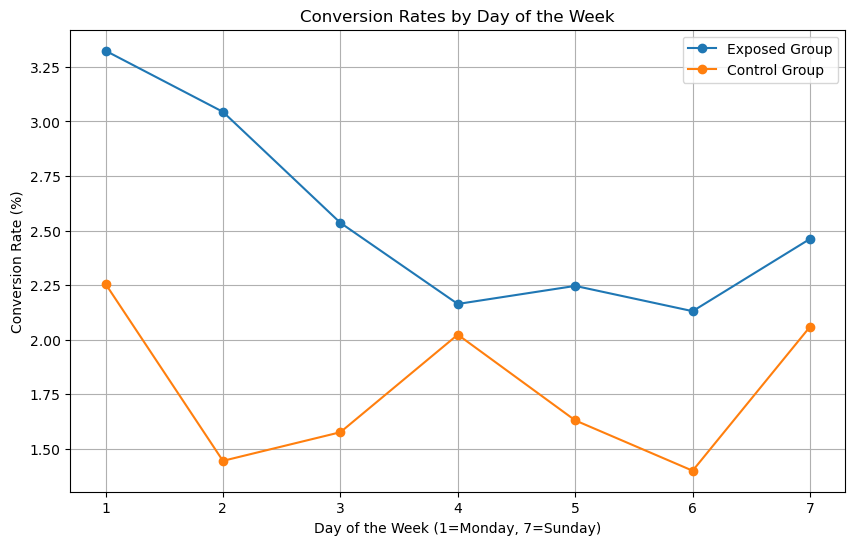

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
csv_path = 'rocket_fuel.csv'
rocket_fuel_data = pd.read_csv(csv_path)

# Group by 'mode_impr_day' (day of the week) and 'test' (exposed vs control) to calculate conversion rates
conversion_rate_by_day = rocket_fuel_data.groupby(['mode_impr_day', 'test'])['converted'].mean() * 100

# Separate data for exposed and control groups
conversion_rate_exposed_by_day = conversion_rate_by_day.xs(1, level='test')
conversion_rate_control_by_day = conversion_rate_by_day.xs(0, level='test')

# Plot the conversion rates by day for both groups
plt.figure(figsize=(10, 6))
plt.plot(conversion_rate_exposed_by_day.index, conversion_rate_exposed_by_day, label="Exposed Group", marker='o')
plt.plot(conversion_rate_control_by_day.index, conversion_rate_control_by_day, label="Control Group", marker='o')
plt.title("Conversion Rates by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Conversion Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

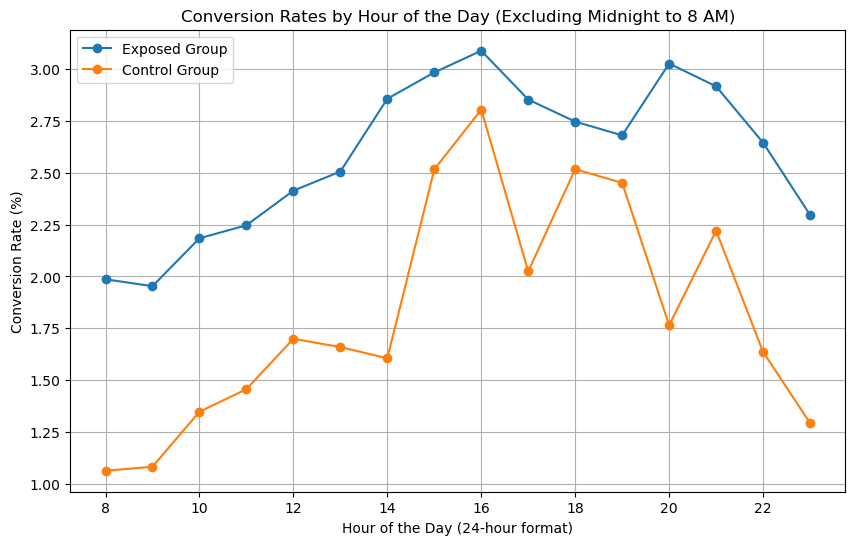

In [6]:
# Group by 'mode_impr_hour' (hour of the day) and 'test' (exposed vs control) to calculate conversion rates
conversion_rate_by_hour = rocket_fuel_data.groupby(['mode_impr_hour', 'test'])['converted'].mean() * 100

# Exclude hours between midnight and 8 a.m.
conversion_rate_by_hour_filtered = conversion_rate_by_hour.loc[8:23]

# Separate data for exposed and control groups
conversion_rate_exposed_by_hour = conversion_rate_by_hour_filtered.xs(1, level='test')
conversion_rate_control_by_hour = conversion_rate_by_hour_filtered.xs(0, level='test')

# Plot the conversion rates by hour for both groups
plt.figure(figsize=(10, 6))
plt.plot(conversion_rate_exposed_by_hour.index, conversion_rate_exposed_by_hour, label="Exposed Group", marker='o')
plt.plot(conversion_rate_control_by_hour.index, conversion_rate_control_by_hour, label="Control Group", marker='o')
plt.title("Conversion Rates by Hour of the Day (Excluding Midnight to 8 AM)")
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Conversion Rate (%)")
plt.legend()
plt.grid(True)
plt.show()